Ido Zemel : 205500663

Hila Peled: 205660655

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


# Data preprocessing (10%)

Feature scaling and selecting 2 classes

In [ ]:
#Select only the digit 0 and 1 images
Ytmp = y[np.where((y == '0') | (y == '1'))]
XSof = X/255
XSof = X[np.where((y == '0') | (y == '1'))]

Split the data into Train set and Test set

In [ ]:
# TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)
from sklearn.utils import shuffle

X = XSof
Y = Ytmp

# Use shuffle on the train data
X, y = shuffle(X, Y)

#Splitting the train 80% and test 20%
n = X.shape[0]
split = int(n * 0.8)
index = np.arange(n)
np.random.shuffle(index)

X_train, X_test = X[index[:split]], X[index[split:]]
Y_train, Y_test = y[index[:split]], y[index[split:]]

#Transposing our X matrix
X_train = X_train.T
X_test = X_test.T

#Making our Y a 2D array
examplesTraing = Y_train.shape[0]
Y_train = Y_train.reshape(examplesTraing , 1)
examplesTest = Y_test.shape[0]
Y_test = Y_test.reshape(examplesTest , 1)

Test yourself

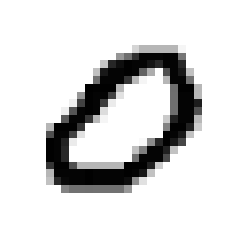

'0'

In [ ]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[i,0]

After a few clicks testing ourself. the data have splitted.

# Activation functions (10%)

In [ ]:
#TODO: Sigmoid activation function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Loss function (20%)

In [ ]:
#TODO: Binary cross entropy
def log_loss(y_hat, y):
    if  (y_hat ==0)|(y_hat ==1):
      y_hat = 0.5
 
    cost = -y*np.log(y_hat) - (1-y)*np.log(1-y_hat)
    
    if(y_hat == 0):
      if y ==1:
        cost = 100000
      if y==0:
        cost = 0
    if(y_hat ==1):
      if y==0:
        cost = 100000
      if y==1:
        cost = 0

    return cost

# NN Parameters

In [ ]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = 128
learning_rate = 0.1
epochs = 100

# Weight and Bias Initialization

In [ ]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(128, 784)
(128, 1)
(1, 128)
(1, 1)


# Train (30%)

In [ ]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
numOfTraining = len(X)

for i in range(epochs):
  avg_epoch_loss = 0
  for j in range(numOfTraining):
   
    # TODO :  Forward propagation
    Z1 = np.matmul(W1,X[:,j])
    b1 = np.squeeze(np.asarray(b1))
    Z1 = Z1+b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1)
    Z2 = Z2+b2
    Z2=np.squeeze(np.asarray(Z2),axis=0)
    A2 = sigmoid(Z2)
    Yout = int(Y[j,:])

    # TODO: Compute loss
    loss = log_loss(A2, Yout)
    avg_epoch_loss = avg_epoch_loss + loss / numOfTraining

    # Back propagation
    dZ2 = A2 - Yout
    dZ2a = np.squeeze(np.asarray(dZ2))
    dW2 = (1 / numOfTraining) * np.dot(dZ2a, A1)
    db2 = (1 / numOfTraining) * np.sum(dZ2, axis=0, keepdims=True)
    dA1 = A1 - np.power(A1, 2)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), dA1)
    x1 = np.matrix(X[:,j])
    x1=x1.transpose()
    dZ1m = np.matrix(dZ1)
    dW1 = (1 / numOfTraining) * np.dot(dZ1m.T, x1.T)
    db1 = (1 / numOfTraining) * np.sum(dZ1, axis=0, keepdims=True)

    # TODO: Update weights
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1=np.array(W1)
 
  avg_epoch_loss = avg_epoch_loss/numOfTraining
  loss_list.append(loss)
  epoch_list.append(i)

  print("Epoch", i," Loss:", avg_epoch_loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 0  Loss: [0.00195287]
Epoch 1  Loss: [0.00164574]
Epoch 2  Loss: [0.00145854]
Epoch 3  Loss: [0.00132508]
Epoch 4  Loss: [0.00125449]
Epoch 5  Loss: [0.0011949]
Epoch 6  Loss: [0.00114683]
Epoch 7  Loss: [0.00109997]
Epoch 8  Loss: [0.00106013]
Epoch 9  Loss: [0.00101611]
Epoch 10  Loss: [0.00097932]
Epoch 11  Loss: [0.00095058]
Epoch 12  Loss: [0.00091841]
Epoch 13  Loss: [0.0008898]
Epoch 14  Loss: [0.00086381]
Epoch 15  Loss: [0.0008407]
Epoch 16  Loss: [0.00081868]
Epoch 17  Loss: [0.00079753]
Epoch 18  Loss: [0.00077343]
Epoch 19  Loss: [0.00074995]
Epoch 20  Loss: [0.00072953]
Epoch 21  Loss: [0.00070701]
Epoch 22  Loss: [0.00068976]
Epoch 23  Loss: [0.00067402]
Epoch 24  Loss: [0.00065738]
Epoch 25  Loss: [0.000643]
Epoch 26  Loss: [0.0006292]
Epoch 27  Loss: [0.0006159]
Epoch 28  Loss: [0.00060317]
Epoch 29  Loss: [0.00059091]
Epoch 30  Loss: [0.00057839]
Epoch 31  Loss: [0.0005652]
Epoch 32  Loss: [0.00055429]
Epoch 33  Loss: [0.00054377]
Epoch 34  Loss: [0.00053362]
Epo

# Visualization

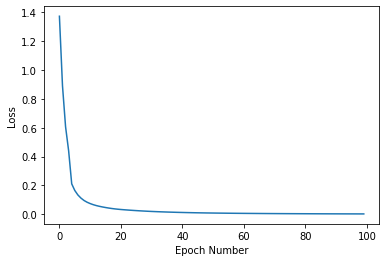

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

# Test your performance (30%)

In [ ]:
#TODO: Forward batch of examples
X = X_test
Y = Y_test

Z1 = np.matmul(W1,X)
A1 = sigmoid(Z1)
Z2 = np.matmul(W2,A1)
A2 = sigmoid(Z2)


predictions = np.zeros((1,Y.shape[0]))
labels = np.zeros((1,Y.shape[0]))

# Check your predictions against the test's labels
for i in range(Y.shape[0]):
  if (A2[0,i] > 0.5): 
    predictions[0,i] = 1
  labels[0,i] = Y[i,0]


# Print the confusion matrix In order to test your performance
print(confusion_matrix(predictions.T, labels.T))

[[1288   95]
 [ 115 1458]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


#TP matrix & accuracy

In [ ]:
n0=0
tp0=0
n1=0
tp1=0
testPred = []
testY = []
for i in range(len(X_test[1])):

    Z1 = np.matmul(W1,X_test[:,i]) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    Yout = Y[i,0]
    if Yout == '0':
      n0=n0+1
      if A2<0.5:
        tp0=tp0+1
    if Yout == '1':
      n1=n1+1
      if A2>0.5:
        tp1=tp1+1
    #Accuracy graph
    testY.append(Yout)
    testPred.append(A2[0])
    
#print("Real=", Y_test[0,i], "Predicted=",float(A2))
print("   n    tp")
print("0 ",n0,tp0)
print("1 ",n1,tp1)
print("prediction", (tp0 + tp1) / (n0 + n1))

   n    tp
0  1403 1288
1  1553 1458
prediction 0.928958051420839


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


**We got ourself an accuracy of +92%**

In [ ]:
#TODO: SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random

for i in range(10):
  i = random.randint(2000)
  plt.imshow(X_test[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
  plt.axis("off")
  plt.show()
  Y_test[i,0]

  Z1 = np.matmul(W1,X_test[:,i])
  A1 = sigmoid(Z1)
  Z2 = np.matmul(W2,A1)
  A2 = sigmoid(Z2)
  Yout = Y[i,0] 
  print("Real=", Y_test[i,0], "Predicted=",A2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


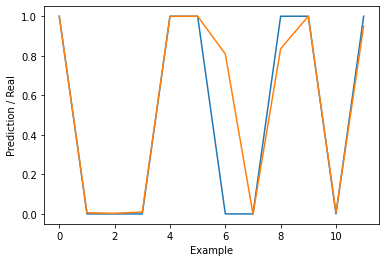

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('Example')
plt.ylabel("Prediction / Real")

nme = list(range(0, 12))
realLabel = []
Predict = []

for i in range(0, 12):

    Z1 = np.matmul(W1,X_test[:,i])+b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    Yout = int(Y[i,0]) 
    
    realLabel.append(Yout)
    Predict.append(A2[0])


plt.plot(nme,realLabel)
plt.plot(nme,Predict)